data source: https://www.kaggle.com/AnalyzeBoston/crimes-in-boston


updated: https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system


Features de Dia e Noite durate o ano em Boston,MA.
https://www.timeanddate.com/sun/usa/boston


Dados Climáticos fornecidos pela NOAA (National Oceanic and Atmospheric Administration). A NOAA é um órgão para assuntos sobre meteorologia, oceanos, atmosfera e clima, advertindo sobre perigos no tempo e mares, guia o uso e a proteção do oceano e de recursos litorâneos, e conduzem pesquisas para melhorar a compreensão do meio ambiente (https://pt.wikipedia.org/wiki/Administra%C3%A7%C3%A3o_Oce%C3%A2nica_e_Atmosf%C3%A9rica_Nacional). 

https://www.climate.gov/maps-data/dataset/past-weather-zip-code-data-table
https://www.ncdc.noaa.gov/cdo-web/search



Exemplos
Oleksandr Kosovan
https://www.kaggle.com/kosovanolexandr/crimes-in-boston-multiclass-clustering

rgriffin
https://www.kaggle.com/heesoo37/boston-crimes-starter-eda

In [1]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from workalendar.usa import UnitedStates
from datetime import datetime




In [2]:
#crimes = pd.read_parquet('crime.parquet')

crime_code = pd.read_csv('crime.csv')
offense_codes = pd.read_csv('offense_codes.csv', encoding = "ISO-8859-1")
boston_noaa = pd.read_csv('2012098.csv', encoding = "ISO-8859-1")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
crime_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455910 entries, 0 to 455909
Data columns (total 17 columns):
INCIDENT_NUMBER        455910 non-null object
OFFENSE_CODE           455910 non-null int64
OFFENSE_CODE_GROUP     426839 non-null object
OFFENSE_DESCRIPTION    455910 non-null object
DISTRICT               453603 non-null object
REPORTING_AREA         455910 non-null object
SHOOTING               30817 non-null object
OCCURRED_ON_DATE       455910 non-null object
YEAR                   455910 non-null int64
MONTH                  455910 non-null int64
DAY_OF_WEEK            455910 non-null object
HOUR                   455910 non-null int64
UCR_PART               426729 non-null object
STREET                 440634 non-null object
Lat                    428184 non-null float64
Long                   428184 non-null float64
Location               455910 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 59.1+ MB


### Data wrangling/Data munging

1. Split do campo de timestamp do dataset de crimes para utilização posterior e transformação em Hash para utilização em merges.

In [4]:
new = crime_code["OCCURRED_ON_DATE"].str.split(" ", n = 1, expand = True) 
crime_code["DdMmYy"]= new[0] 
crime_code["HsMnSg"]= new[1]

# hash
crime_code['hash'] = crime_code['DdMmYy'].apply(hash)

# Drop das colunas temporarias usadas
crime_code.drop(columns =["DdMmYy","HsMnSg"], inplace = True) 


2. Conversão campo OCCURRED_ON_DATE de string para timestamp

In [5]:
crime_code['OCCURRED_ON_DATE'] = pd.to_datetime(crime_code['OCCURRED_ON_DATE'])

3. Criação de campo com hash da data para marge com os dados de crimes e ocorrências

In [6]:
boston_noaa.drop(columns =["STATION","NAME"], inplace = True) 
# hash
boston_noaa['hash'] = boston_noaa['DATE'].apply(hash)


In [ ]:
boston_noaa

4. Cruzamento dos de ocorrência com códigos e descrições

In [7]:
#crimes['CODE'] = crimes['OFFENSE_CODE']

#crime_code = pd.merge(crimes, offense_codes, on="CODE", how="right")

#crime_code.drop(columns =["OFFENSE_CODE"], inplace = True) 

### Data Analysis

Qual é o local da cidade com maior quantidade de ocorrências. Pode ser rua, avenida ou outro tipo.

In [8]:
crime_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455910 entries, 0 to 455909
Data columns (total 18 columns):
INCIDENT_NUMBER        455910 non-null object
OFFENSE_CODE           455910 non-null int64
OFFENSE_CODE_GROUP     426839 non-null object
OFFENSE_DESCRIPTION    455910 non-null object
DISTRICT               453603 non-null object
REPORTING_AREA         455910 non-null object
SHOOTING               30817 non-null object
OCCURRED_ON_DATE       455910 non-null datetime64[ns]
YEAR                   455910 non-null int64
MONTH                  455910 non-null int64
DAY_OF_WEEK            455910 non-null object
HOUR                   455910 non-null int64
UCR_PART               426729 non-null object
STREET                 440634 non-null object
Lat                    428184 non-null float64
Long                   428184 non-null float64
Location               455910 non-null object
hash                   455910 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(1

In [9]:
offense_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 2 columns):
CODE    576 non-null int64
NAME    576 non-null object
dtypes: int64(1), object(1)
memory usage: 9.1+ KB


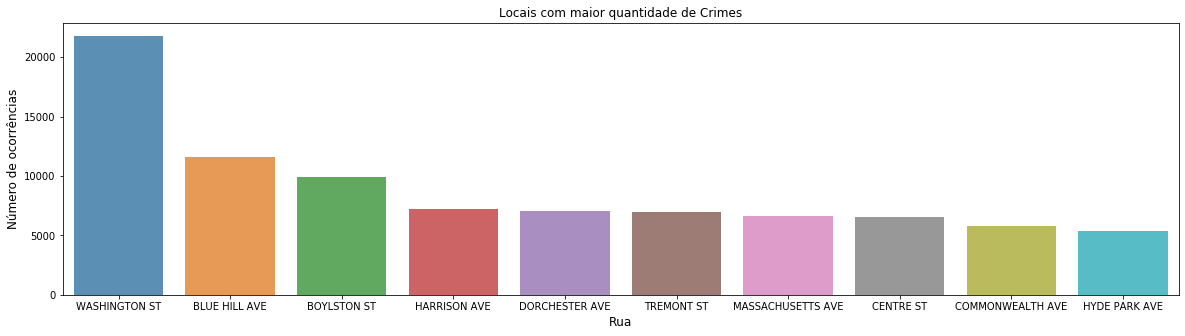

In [10]:
crime_count  = crime_code['STREET'].value_counts()
crime_count = crime_count[:10,]
plt.figure(figsize=(20,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Locais com maior quantidade de Crimes')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Rua', fontsize=12)
plt.show()

In [ ]:
crime_count  = crime_code['NAME'].value_counts()
crime_count = crime_count[:10,]
plt.figure(figsize=(33,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Maiores quantidades de queixas e ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Queixas', fontsize=12)
plt.show()

In [ ]:
crime_count  = crime_code['HOUR'].value_counts()
crime_count = crime_count[:24,]
plt.figure(figsize=(15,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Hora com maior quantidade de ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Hora', fontsize=12)
plt.show()

In [ ]:
crime_count  = crime_code['DAY_OF_WEEK'].value_counts()
crime_count = crime_count[:7,]
plt.figure(figsize=(15,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Dia da Semana com maior quantidade de ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Dia da Semana', fontsize=12)
plt.show()

In [ ]:
crime_count  = crime_code['MONTH'].value_counts()
crime_count = crime_count[:12,]
plt.figure(figsize=(15,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Mês com maior quantidade de ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Mês', fontsize=12)
plt.show()

In [ ]:
crime_count  = crime_code['DISTRICT'].value_counts()
crime_count = crime_count[:12,]
plt.figure(figsize=(15,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Distrito com maior quantidade de ocorrências')
plt.ylabel('Número de ocorrências', fontsize=12)
plt.xlabel('Distrito', fontsize=12)
plt.show()

In [ ]:
plt.title("Volume de precipitações pluviométricas em 5 anos")
plt.xlabel("DiasMesesAnos")
plt.ylabel("degrees F +/- from average")
plt.bar(boston_noaa['DATE'], boston_noaa['TAVG'], color='blue')
plt.show()

Distribuição das ocorrências em um mapa da cidade de Boston. No gráfico demostra a ocorrência em Latitude e Longitude.

In [11]:
location_shoot = crime_count[['Lat','Long']]
location_shoot = location_shoot.dropna()

location_shoot = location_shoot.loc[(location_shoot['Lat']>40) & (location_shoot['Long'] < -60)]  

x_shoot = location_shoot['Long']
y_shoot = location_shoot['Lat']

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
#sns.jointplot(x_shoot, y_shoot, kind='scatter')
#sns.jointplot(x_shoot, y_shoot, kind='reg')
#sns.jointplot(x_shoot, y_shoot, kind='resid')
#sns.jointplot(x_shoot, y_shoot, kind='hex')
sns.jointplot(x_shoot, y_shoot, kind='kde')

NameError: name 'crimes' is not defined

### Feature Engeneering

Criação de features interessantes que poder ser utilizadas na interpretação de eventos e que poderão ser úteis no para o modelo. 

#### Dia e Noite

A primeira que será criada é Dia ou Noite, ou seja, a ocorrêcia se deu em durante o dia ou durante a noite.

1.Definição das variáveis como valores padrões

In [12]:
crime_code['Day'] = 0
crime_code['Night'] = 0

2.Marcação dos dados

In [13]:
# Day or night for 1st month
crime_code['Day'].loc[(crime_code['MONTH'] == 1) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 18)] = 1

# Day or night for 2st month
crime_code['Day'].loc[(crime_code['MONTH'] == 2) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 19)] = 1

# for 3st month
crime_code['Day'].loc[(crime_code['MONTH'] == 3) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 20)] = 1

# Day or night for 4st month
crime_code['Day'].loc[(crime_code['MONTH'] == 4) & (crime_code['HOUR'] >= 5) & (crime_code['HOUR'] <= 20)] = 1

# Day or night for 5st month
crime_code['Day'].loc[(crime_code['MONTH'] == 5) & (crime_code['HOUR'] >= 5) & (crime_code['HOUR'] <= 21)] = 1

# Day or night for 6st month
crime_code['Day'].loc[(crime_code['MONTH'] == 6) & (crime_code['HOUR'] >= 4) & (crime_code['HOUR'] <= 21)] = 1

# Day or night for 7st month
crime_code['Day'].loc[(crime_code['MONTH'] == 7) & (crime_code['HOUR'] >= 5) & (crime_code['HOUR'] <= 21)] = 1

# Day or night for 8st month
crime_code['Day'].loc[(crime_code['MONTH'] == 8) & (crime_code['HOUR'] >= 5) & (crime_code['HOUR'] <= 21)] = 1

# Day or night for 9st month
crime_code['Day'].loc[(crime_code['MONTH'] == 9) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 20)] = 1

# Day or night for 10st month
crime_code['Day'].loc[(crime_code['MONTH'] == 10) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 19)] = 1

# Day or night for 11st month
crime_code['Day'].loc[(crime_code['MONTH'] == 11) & (crime_code['HOUR'] >= 6) & (crime_code['HOUR'] <= 17)] = 1

# Day or night for 12st month
crime_code['Day'].loc[(crime_code['MONTH'] == 12) & (crime_code['HOUR'] >= 7) & (crime_code['HOUR'] <= 17)] = 1


C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


3.Marcação dos dados, quando for noite marca 1.

In [14]:
crime_code['Night'].loc[crime_code['Day']==0]=1

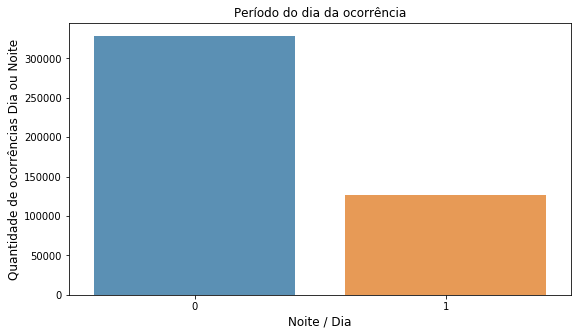

In [15]:
crime_count  = crime_code['Night'].value_counts()
crime_count = crime_count[:12,]
plt.figure(figsize=(9,5))
sns.barplot(crime_count.index, crime_count.values, alpha=0.8)
plt.title('Período do dia da ocorrência')
plt.ylabel('Quantidade de ocorrências Dia ou Noite', fontsize=12)
plt.xlabel('Noite / Dia', fontsize=12)
plt.show()

#### Feriados Nacionais

A segunda feature que será criada é Feriados (Holidays), a experiência policial afirma que grande parte das ocorrências ocorrem nos feriados. São diversas classes de eventos que podem ser classificados dos mais brandos a o mais graves. Os feriados nacionais em questão são dos Estados Unidos da Américas (USA), no Estado de Massachusetts acrescenta o Patriot's Day, dia em que ocorre a Boston Marathon.

In [17]:
cal = UnitedStates()

start = crime_code['OCCURRED_ON_DATE'].min()
start_year = start.year  # Assuming dates are Timestamp objects.
end = crime_code['OCCURRED_ON_DATE'].max()
end_year = end.year 

holidays = set(holiday[0] 
               for year in range(start_year, end_year + 1)
               for holiday in cal.holidays(year)
               if start.date() <= holiday[0] <= end.date())

crime_count['Holiday'] = crime_code['OCCURRED_ON_DATE'].isin(holidays)

### https://stackoverflow.com/questions/57403835/pandas-using-workalendar-to-check-if-a-date-is-a-holiday-and-assigning-boolean?noredirect=1&lq=1

#### Informações Climáticas

In [18]:
boston_noaa.drop(columns =["DATE"], inplace = True) 
data_noaa_boston = pd.merge(crime_code, boston_noaa, on="hash", how="left")

In [19]:
data_noaa_boston

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,...,Long,Location,hash,Day,Night,PRCP,SNWD,TAVG,TMAX,TMIN
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,...,NaN,"(0.00000000, 0.00000000)",-6673749431235165325,0,1,0.53,NaN,54,63,46
1,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,...,-71.107779,"(42.32512200, -71.10777900)",-5696514194592867247,0,1,0.00,NaN,23,33,17
2,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,...,-71.059709,"(42.29755500, -71.05970900)",2875787278229279061,0,1,0.42,NaN,61,70,53
3,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,...,-71.162678,"(42.35512000, -71.16267800)",1807267328962049023,1,0,0.09,NaN,48,56,39
4,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,...,-71.104294,"(42.30971800, -71.10429400)",2084109179309942876,0,1,0.40,NaN,52,58,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455905,120200242,3115,NaN,INVESTIGATE PERSON,D4,167,0,2020-01-05 00:00:00,2020,1,...,-71.069408,"(42.33954100, -71.06940800)",-4643302127451433403,0,1,0.11,NaN,39,41,32
455906,120200013,2403,NaN,DISTURBING THE PEACE/ DISORDERLY CONDUCT/ GATH...,A1,84,0,2020-01-01 01:02:00,2020,1,...,-71.054070,"(42.36416700, -71.05407000)",-7857699504478851962,0,1,0.00,NaN,39,43,36
455907,102096818,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,A1,,0,2019-11-30 21:00:00,2019,11,...,-71.061316,"(42.36086600, -71.06131600)",7616453087075541518,0,1,0.00,NaN,33,39,26
455908,102095489,3115,NaN,INVESTIGATE PERSON,E18,520,0,2019-11-25 16:30:00,2019,11,...,-71.124019,"(42.25621500, -71.12401900)",5635383585482463945,1,0,0.00,NaN,46,54,41


In [ ]:
data_noaa_boston.describe()

In [ ]:
data_noaa_boston.info()

In [ ]:
offense_codes

### Model Build

Verificação da correlação existente entre os dados. Utilizo a Correlação de Pearson.

In [ ]:
data_noaa_boston.info()

In [20]:
data_noaa_boston['hash_1'] = data_noaa_boston['OFFENSE_CODE_GROUP'].apply(hash)
data_noaa_boston['hash_2'] = data_noaa_boston['Location'].apply(hash)
data_noaa_boston['hash_3'] = data_noaa_boston['REPORTING_AREA'].apply(hash)
data_noaa_boston['hash_4'] = data_noaa_boston['OFFENSE_DESCRIPTION'].apply(hash)
data_noaa_boston['hash_5'] = data_noaa_boston['DISTRICT'].apply(hash)
#data_noaa_boston['hash_6'] = data_noaa_boston['Lat'].apply(hash)
#data_noaa_boston['hash_7'] = data_noaa_boston['Long'].apply(hash)
data_noaa_boston['hash_8'] = data_noaa_boston['STREET'].apply(hash)
data_noaa_boston['hash_9'] = data_noaa_boston['OCCURRED_ON_DATE'].apply(hash)




In [ ]:
## concat
#data_noaa_boston['concat_desc'] = data_noaa_boston['hash_1']+data_noaa_boston['hash_2']+data_noaa_boston['hash_3']+data_noaa_boston['hash_4']+data_noaa_boston['hash_5']+data_noaa_boston['hash_8']+data_noaa_boston['OCCURRED_ON_DATE']


In [ ]:
data_noaa_boston




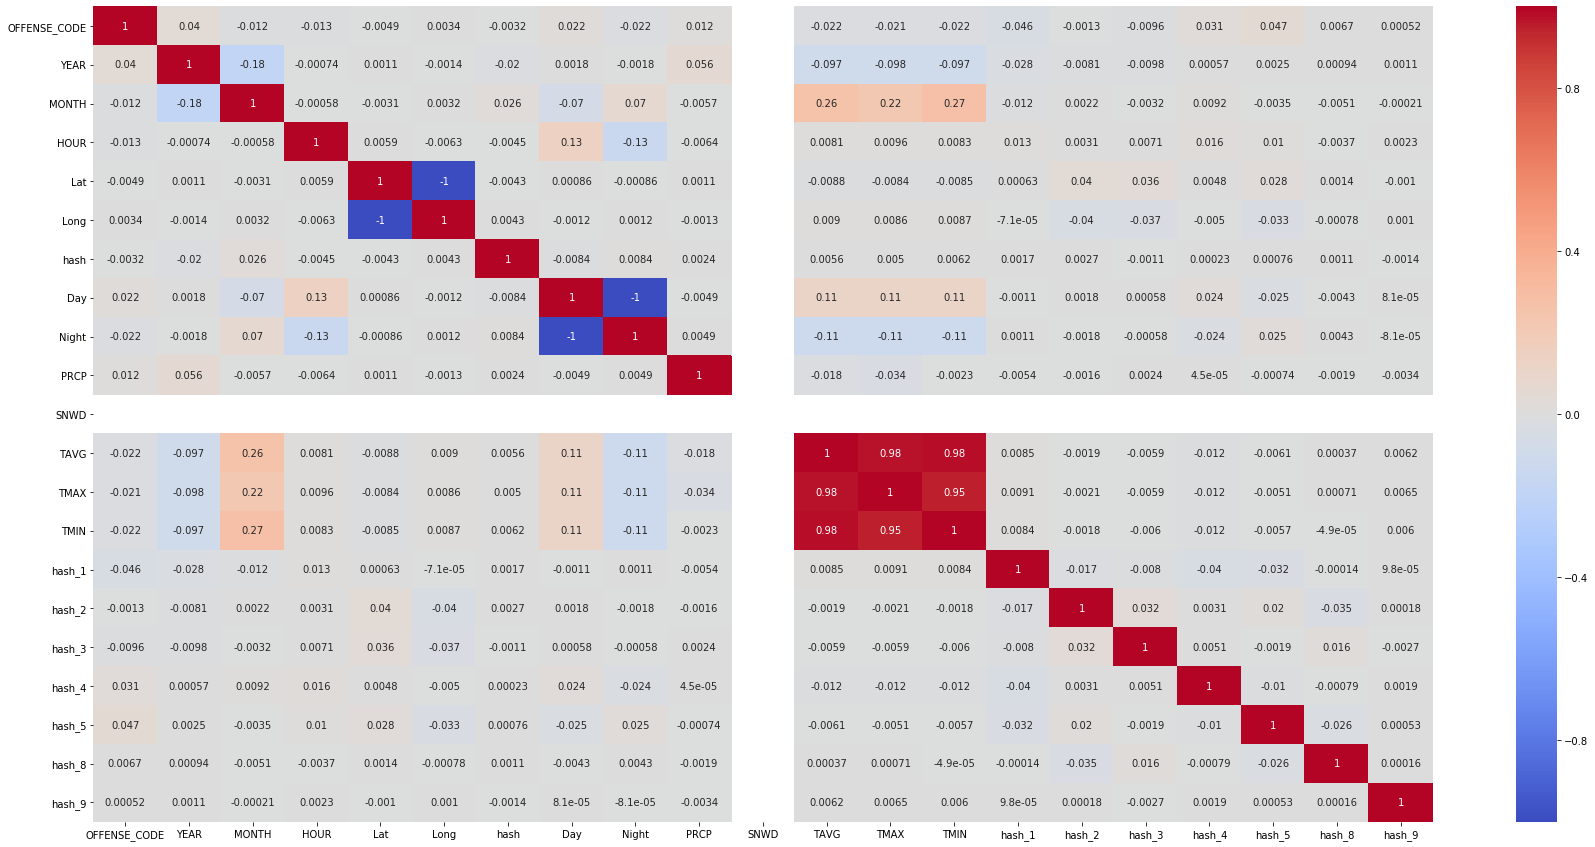

In [21]:
plt.figure(figsize=(30,15))
sns.heatmap(data_noaa_boston.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

In [ ]:
data_noaa_boston.info()

In [22]:
boston_crimes_2 = data_noaa_boston[['YEAR','MONTH','DAY_OF_WEEK','HOUR','Location','hash','Day','Night','PRCP','TAVG','TMAX','TMIN','hash_1','hash_2','hash_3','hash_4','hash_5','hash_8','hash_9']]

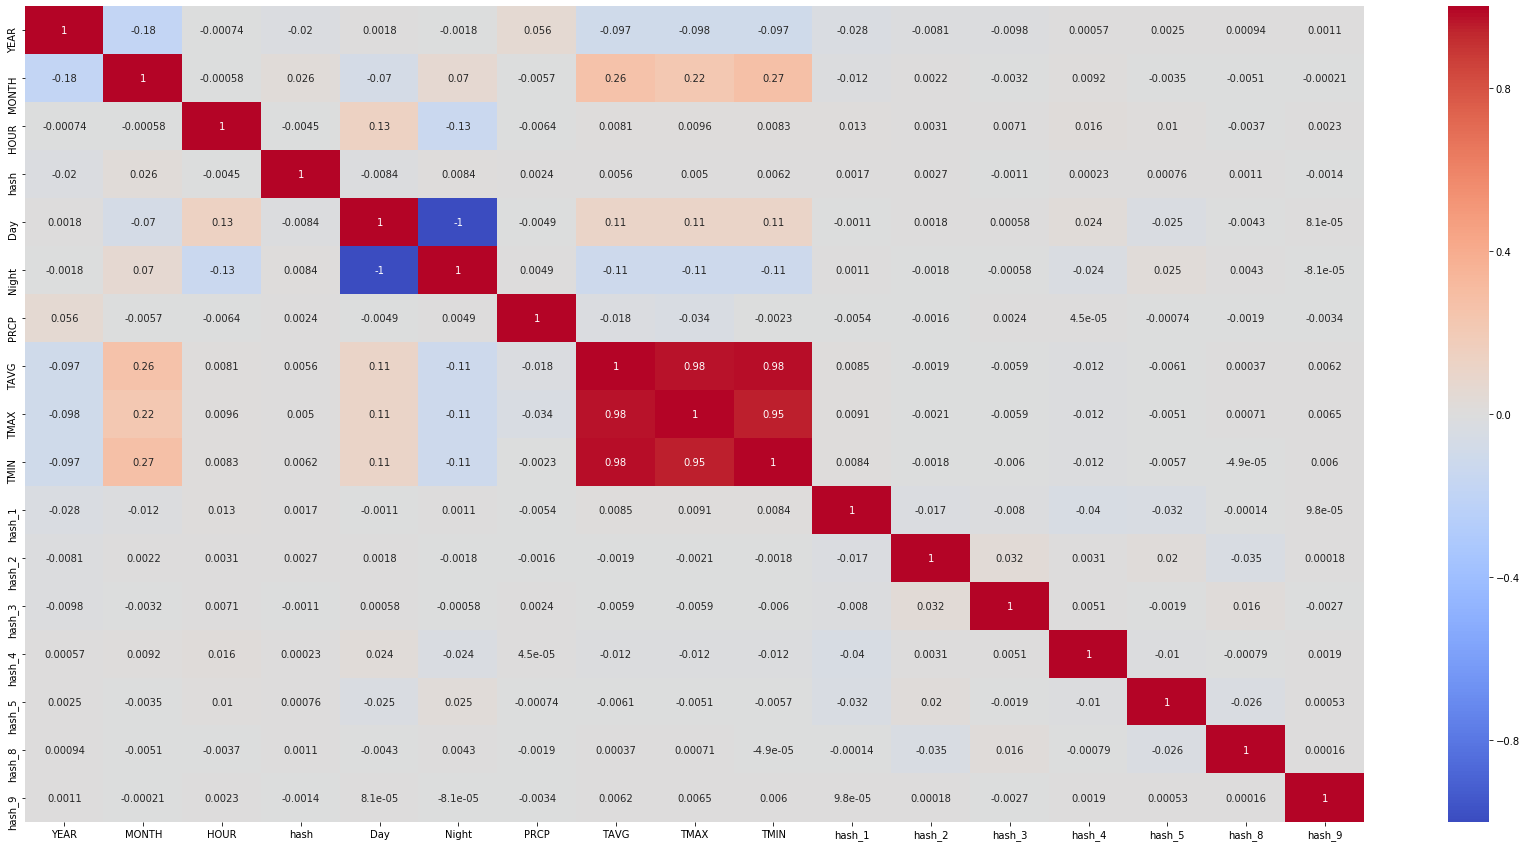

In [23]:
plt.figure(figsize=(30,15))
sns.heatmap(boston_crimes_2.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

In [24]:
dataset_final_boston_crimes = pd.get_dummies(boston_crimes_2)

MemoryError: 

In [25]:
boston_crimes_2

,YEAR,MONTH,DAY_OF_WEEK,HOUR,Location,hash,Day,Night,PRCP,TAVG,TMAX,TMIN,hash_1,hash_2,hash_3,hash_4,hash_5,hash_8,hash_9
0,2019,10,Wednesday,0,"(0.00000000, 0.00000000)",-6673749431235165325,0,1,0.53,54,63,46,0,-5358502915058145330,-4930804311835976873,4859656081635676150,-1158069686305112223,-8526951144280963727,691308865644206692
1,2019,12,Friday,3,"(42.32512200, -71.10777900)",-5696514194592867247,0,1,0.00,23,33,17,0,3165886484896885591,6778922576596184912,1823847865633717851,2368197386606003677,-6588314405322580586,8699000033118684987
2,2019,10,Wednesday,0,"(42.29755500, -71.05970900)",2875787278229279061,0,1,0.42,61,70,53,0,-8990482261610740656,-3025099372285626083,6600071185826241746,5334442199651165125,3166813346001329823,1204012785896322849
3,2019,11,Friday,7,"(42.35512000, -71.16267800)",1807267328962049023,1,0,0.09,48,56,39,0,-6328726089093628594,7633598655520301481,3891009855429543235,6519843551396368497,-1708029772504840894,-2426405917402665540
4,2019,11,Tuesday,18,"(42.30971800, -71.10429400)",2084109179309942876,0,1,0.40,52,58,45,0,7248583486199037305,4756326946854910453,-5901352858181608995,2368197386606003677,-7188352843101584566,6723213988687832039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455905,2020,1,Sunday,0,"(42.33954100, -71.06940800)",-4643302127451433403,0,1,0.11,39,41,32,0,-9169962003758838763,7041571165404099328,6600071185826241746,-2169014748495643060,4353525886081346582,-4609762285328932544
455906,2020,1,Wednesday,1,"(42.36416700, -71.05407000)",-7857699504478851962,0,1,0.00,39,43,36,0,5544868701235809905,-848377278753982406,-8202591521407463867,2199671831195765150,-1650601104124899484,8808303765987766875
455907,2019,11,Saturday,21,"(42.36086600, -71.06131600)",7616453087075541518,0,1,0.00,33,39,26,0,2924105989004393936,-4930804311835976873,3891009855429543235,2199671831195765150,0,7008096404502983410
455908,2019,11,Monday,16,"(42.25621500, -71.12401900)",5635383585482463945,1,0,0.00,46,54,41,0,7834421713394519290,1568460751098384460,6600071185826241746,347904996044783858,2887760322344777900,2785063758100928753


### Models

In [31]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Take useful feature and standardize them
data = boston_crimes_2[['hash_8', 'MONTH', 'hash', 'PRCP', 'TAVG']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# reduce to 2 importants features
pca = PCA(n_components=2)
data = pca.fit_transform(data)
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [ ]:
# calculate with different number of centroids to see the loss plot (elbow method)
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
plt.show()

In [ ]:
# Not clear for me, I choose 15 centroids arbitrarily and add these data to the central dataframe
boston_crimes_2['cluster'] = kmeans[14].predict(data)
boston_crimes_2['principal_feature1'] = data[0]
boston_crimes_2['principal_feature2'] = data[1]
boston_crimes_2['cluster'].value_counts()

In [ ]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.show()

In [ ]:
boston_crimes_2